In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
data = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
data.values[0]

array(['P03210', 'Karapakkam', 1004, '04-05-2011', 131, 1.0, 1.0, 3,
       'AbNormal', 'Yes', '15-05-1967', 'Commercial', 'AllPub', 'Paved',
       'A', 4.0, 3.9, 4.9, 4.33, 380000, 144400, 7600000], dtype=object)

In [6]:
data.shape

(7109, 22)

In [7]:
data = data.drop(columns = ['PRT_ID','REG_FEE','COMMIS'])

In [8]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [9]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [10]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

### ****Area**** 

In [11]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
data.AREA.isnull().sum()

0

In [13]:
data.AREA.dtypes

dtype('O')

In [14]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [15]:
data.AREA.replace('Karapakam''Karapakkam', inplace=True)
data.AREA.replace('Ann Nagar''Anna Nagar', inplace=True)
data.AREA.replace('Adyr','Adyar', inplace=True)
data.AREA.replace('Velchery','Velachery', inplace=True)
data.AREA.replace('KKNagar','KK Nagar', inplace=True)
data.AREA.replace('TNagar','T Nagar', inplace=True)
data.AREA.replace('Chrompt','Chrompet', inplace=True)
data.AREA.replace('Chrmpet','Chrompet', inplace=True)
data.AREA.replace('Chormpet','Chrompet', inplace=True)
data.AREA.replace('Ana Nagar','Anna Nagar', inplace=True)


### **INT_SQFT**

In [16]:
data.INT_SQFT.isnull().sum()

0

In [17]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

### **DATE_SALE**

In [18]:
data.DATE_SALE.values[0]

'04-05-2011'

In [19]:
data.DATE_SALE.isnull().sum()

0

### **DATE_BUILD**

In [20]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [21]:
data.DATE_BUILD.isnull().sum()

0

### **Age_of_Building**

In [22]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE)

In [23]:
data.DATE_BUILD = data.DATE_BUILD.dt.year
data.DATE_SALE = data.DATE_SALE.dt.year


In [24]:
data['BUILDING_AGE'] = data.DATE_SALE-data.DATE_BUILD

In [25]:
data= data.drop(columns=['DATE_SALE','DATE_BUILD'])

In [26]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


### **DIST_MAINROAD**

In [27]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [28]:
data.DIST_MAINROAD.isnull().sum()

0

### **N_BEDROOM**

In [29]:
data.N_BEDROOM.isnull().sum()

1

In [30]:
data=data.fillna(data["N_BEDROOM"].mode())

In [31]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [32]:
data['N_BEDROOM'] = data['N_BEDROOM'].astype('int64',errors='ignore')


### **N_BATHROOM**

In [33]:
data.N_BATHROOM.isnull().sum()

5

In [34]:
data = data.fillna(data["N_BATHROOM"].mean())

In [35]:
data.N_BATHROOM.describe()

count    7109.000000
mean        1.213260
std         0.409495
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

### **N_ROOM**

In [36]:
data.N_ROOM.isnull().sum()

0

In [37]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

### **SALE_COND**

In [38]:
data.SALE_COND.isnull().sum()

0

In [39]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [40]:
data.SALE_COND.replace('AbNormal','Abnormal', inplace=True)
data.SALE_COND.replace('Ab Normal','Abnormal', inplace=True)
data.SALE_COND.replace('AdjLand','Adj Land', inplace=True)
data.SALE_COND.replace('Partiall','Partial', inplace=True)
data.SALE_COND.replace('PartiaLl','Partial', inplace=True)

In [41]:
data.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

### **PARK_FACIL**

In [42]:
data.PARK_FACIL.isnull().sum()

0

In [43]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [44]:
data.PARK_FACIL.replace('Noo','No',inplace=True)

In [45]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

### **BUILDTYPE**

In [46]:
data.BUILDTYPE.isnull().sum()

0

In [47]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [48]:
data.BUILDTYPE.replace('Others','Other',inplace=True)
data.BUILDTYPE.replace('Comercial','Commercial',inplace=True)

In [49]:
data.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [50]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

### **UTILITY_AVAIL**

In [51]:
data.UTILITY_AVAIL.isnull().sum()

0

In [52]:
data.UTILITY_AVAIL.dropna()

0        AllPub
1        AllPub
2           ELO
3       NoSewr 
4        AllPub
         ...   
7104        ELO
7105     NoSeWa
7106     NoSeWa
7107        ELO
7108        ELO
Name: UTILITY_AVAIL, Length: 7109, dtype: object

In [53]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [54]:
data.UTILITY_AVAIL.replace("AllPub",'All Pub',inplace=True)

In [55]:
data.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [56]:
data.UTILITY_AVAIL.values

array(['All Pub', 'All Pub', 'ELO', ..., 'NoSeWa', 'ELO', 'ELO'],
      dtype=object)

### **STREET**

In [57]:

data.STREET.isnull().sum()

0

In [58]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [59]:
data.STREET.replace('Pavd','Paved',inplace=True)
data.STREET.replace('NoAccess','No Access',inplace=True)

In [60]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

### **MZZONE**

In [61]:
data.MZZONE.isnull().sum()

0

In [62]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

### **SALES_PRICE**

In [63]:
data.SALES_PRICE.isnull().sum()

0

In [64]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

### **QS_OVERALL** 

In [65]:
data.QS_OVERALL.isnull().sum()

0

In [66]:
#mean
data = data.fillna(data["QS_OVERALL"].mean())

### **DATA VISUALIZATION**

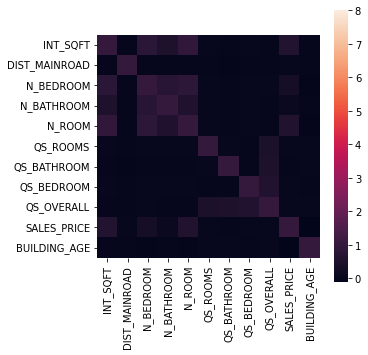

In [67]:
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrmat,vmax=8,square=True)


In [68]:
A = data.AREA.groupby(data.AREA).count()
B = data.AREA.groupby(data.BUILDTYPE).count()
C = data.AREA.groupby(data.UTILITY_AVAIL).count()
D = data.AREA.groupby(data.STREET).count()
E = data.AREA.groupby(data.MZZONE).count()
F = data.AREA.groupby(data.PARK_FACIL).count()

Text(0.5, 1.0, 'No of houses (AREA WISE)')

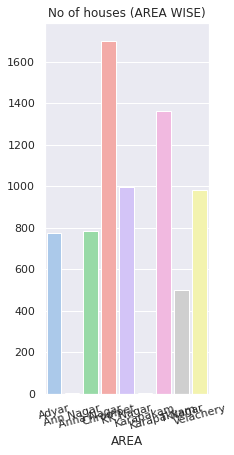

In [69]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,15))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (AREA WISE)")

Text(0.5, 1.0, 'No of houses (BUILD TYPE WISE)')

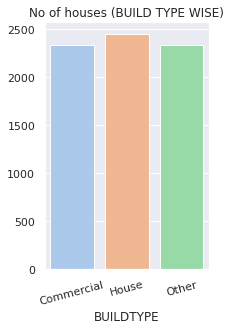

In [70]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,10))
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (BUILD TYPE WISE)")

Text(0.5, 1.0, 'No of houses (UTILITY AVAIL WISE)')

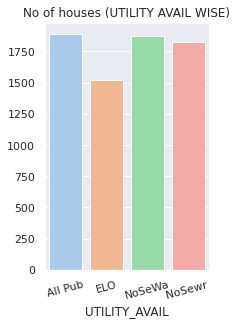

In [71]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,10))
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (UTILITY AVAIL WISE)")

Text(0.5, 1.0, 'No of houses (STREET WISE)')

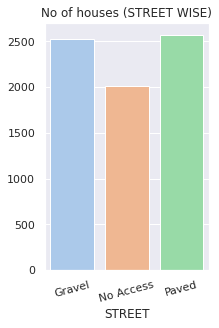

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (STREET WISE)")

Text(0.5, 1.0, 'No of houses (MZZONE WISE)')

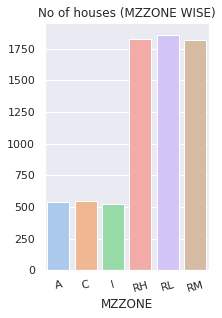

In [73]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,10))
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (MZZONE WISE)")

Text(0.5, 1.0, 'No of houses (PARK FACIL WISE)')

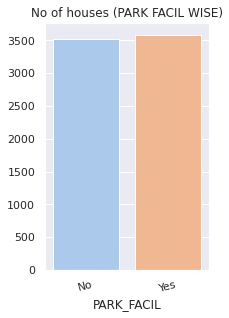

In [74]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,10))
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=data)
plt.xticks(rotation=15)
plt.title("No of houses (PARK FACIL WISE)")

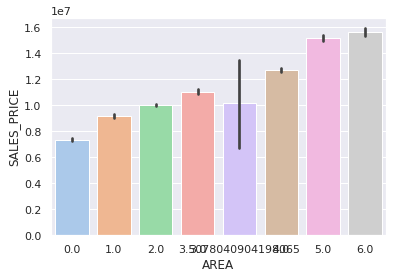

In [157]:
sns.barplot(x=data.AREA,y=data.SALES_PRICE)


Text(0.5, 1.0, 'AREA Vs SALES_PRICE')

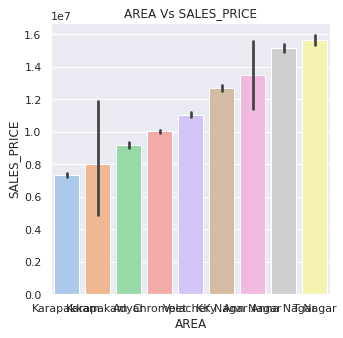

In [76]:
plt.figure(figsize=(5,5))
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title("AREA Vs SALES_PRICE")

Text(0.5, 1.0, 'BUILDTYPE Vs SALES_PRICE')

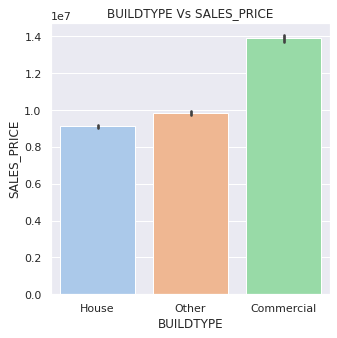

In [77]:
plt.figure(figsize=(5,5))
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("BUILDTYPE Vs SALES_PRICE")

Text(0.5, 1.0, 'UTILITY_AVAIL Vs SALES_PRICE')

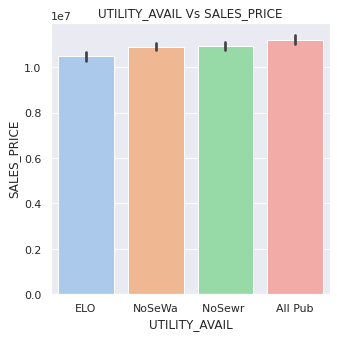

In [78]:
plt.figure(figsize=(5,5))
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("UTILITY_AVAIL Vs SALES_PRICE")




Text(0.5, 1.0, 'STREET Vs SALES_PRICE')

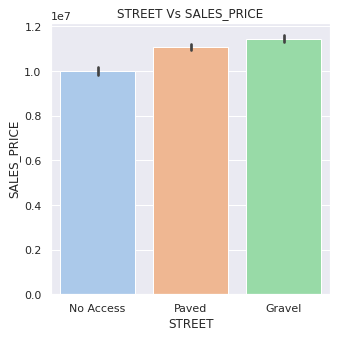

In [79]:
plt.figure(figsize=(5,5))
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("STREET Vs SALES_PRICE")



Text(0.5, 1.0, 'MZZONE Vs SALES_PRICE')

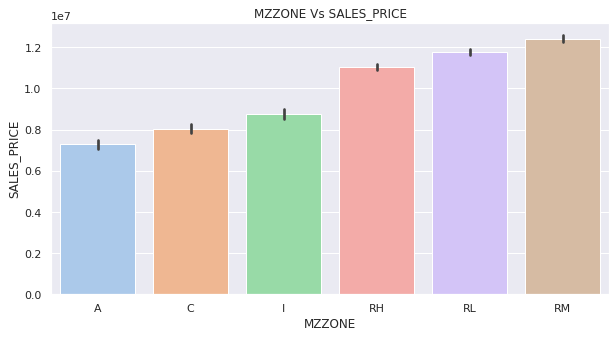

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title("MZZONE Vs SALES_PRICE")



Text(0.5, 1.0, 'PARK_FACIL Vs SALES_PRICE')

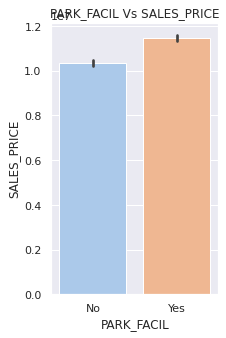

In [81]:
plt.figure(figsize=(3,5))
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("PARK_FACIL Vs SALES_PRICE")

In [82]:
target = data.SALES_PRICE


Text(0.5, 1.0, 'BUILDING_AGE vs SALES_PRICE')

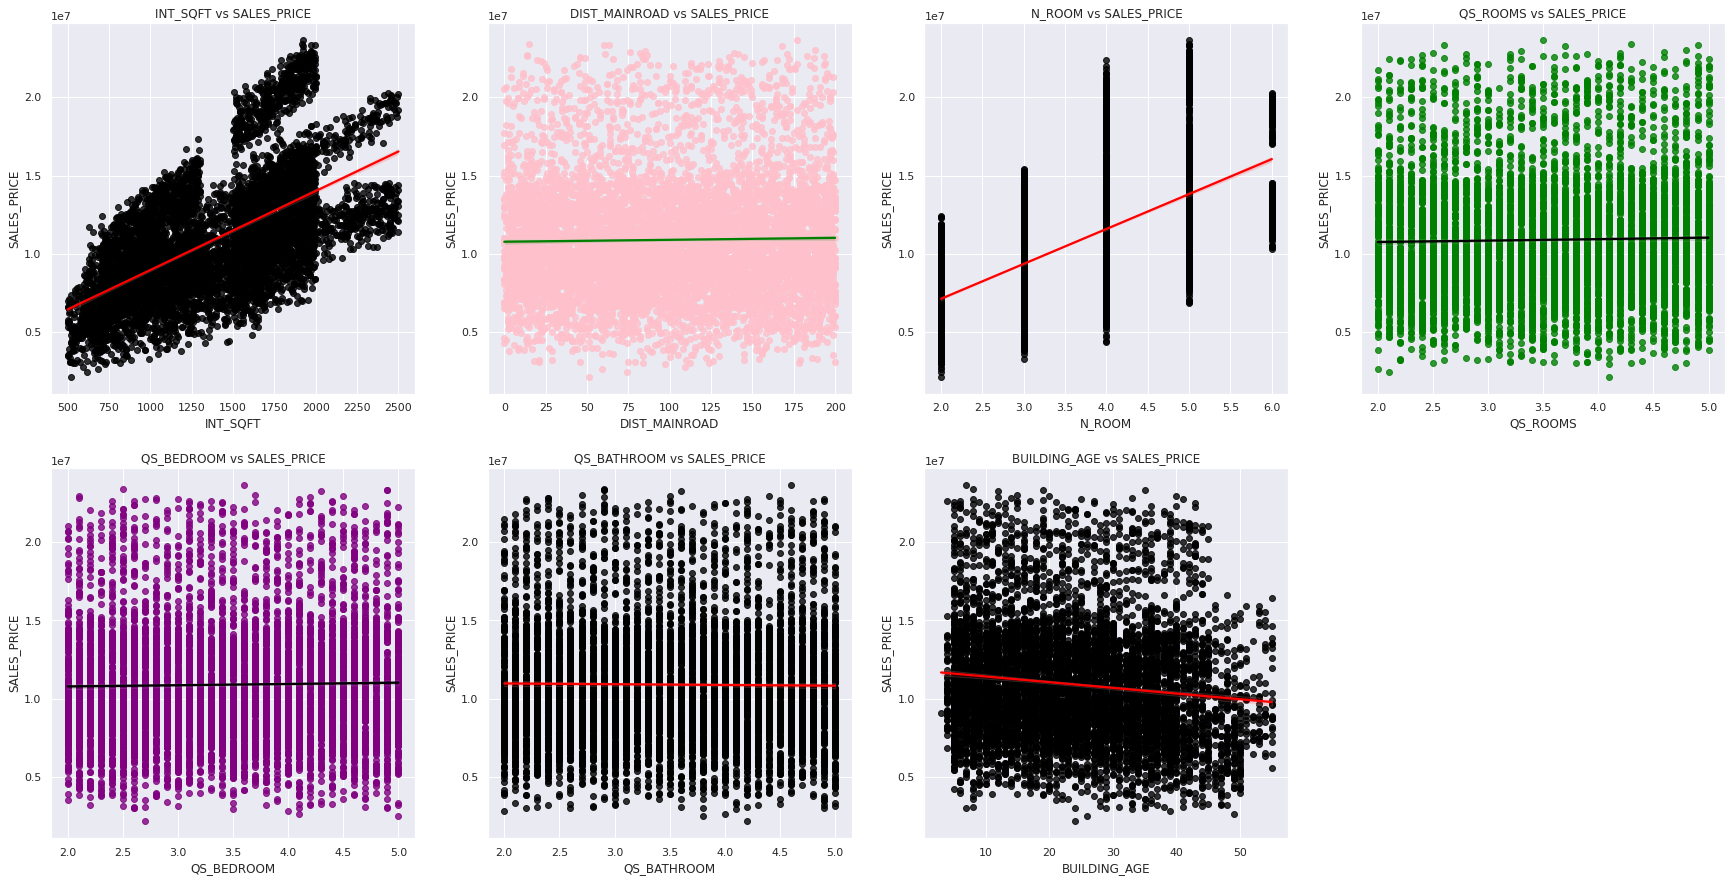

In [83]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.regplot(x = data.INT_SQFT,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(242)
sns.regplot(x = data.DIST_MAINROAD,y=target,scatter_kws={"color": "pink"}, line_kws={"color": "green"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(243)
sns.regplot(x = data.N_ROOM,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("N_ROOM vs SALES_PRICE")

plt.subplot(244)
sns.regplot(x = data.QS_ROOMS,y=target,scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title("QS_ROOMS vs SALES_PRICE")

plt.subplot(245)
sns.regplot(x = data.QS_BEDROOM,y=target,scatter_kws={"color": "purple"}, line_kws={"color": "black"})
plt.title("QS_BEDROOM vs SALES_PRICE")

plt.subplot(246)
sns.regplot(x = data.QS_BATHROOM,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("QS_BATHROOM vs SALES_PRICE")

plt.subplot(247)
sns.regplot(x = data.BUILDING_AGE,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("BUILDING_AGE vs SALES_PRICE")


Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

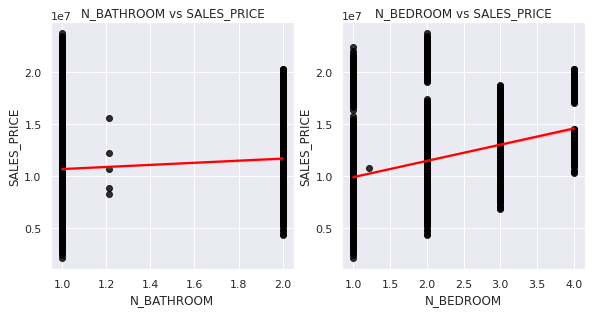

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.regplot(x = data.N_BATHROOM,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("N_BATHROOM vs SALES_PRICE")

plt.subplot(242)
sns.regplot(x = data.N_BEDROOM,y=target,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("N_BEDROOM vs SALES_PRICE")

In [85]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

Area shows a linear relationship hence label encoding is done

In [86]:
data.AREA = data.AREA.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [87]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

SALE_COND shows linear relationship hence label encoding is done

In [88]:
data.SALE_COND = data.SALE_COND.map({'Partial':1,'Family':2,'Abnormal':3,'Normal Sale':4,'Adj Land':5})

PARK_FACIL shows linear relationship hence label encoding is done

In [89]:
data.PARK_FACIL = data.PARK_FACIL.map({'No':0,'Yes':2})

BUILDTYPE: NO linear relationship so one hot encoding

In [90]:
one_hot = pd.get_dummies(data.BUILDTYPE).astype(int)
data = data.join(one_hot)


In [91]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE', 'Commercial', 'House',
       'Other'],
      dtype='object')

UTILITY_AVAIL shows linear relat hence label encoding



In [92]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'Elo':1,'NoSewa':2,'NoSewr ':3,'All Pub':4})

STREET shows linear relat hence label encoding

In [93]:
data.STREET = data.STREET.map({'No Access':1,'Paved':2,'Gravel':3})

MZZONE shows linear relationship hence label encoding

In [94]:
data.MZZONE = data.MZZONE.map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})

In [95]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE', 'Commercial', 'House',
       'Other'],
      dtype='object')

In [96]:
data = data.fillna(data["UTILITY_AVAIL"].mean())

In [97]:
data = data.drop(columns = ['BUILDTYPE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'])


In [98]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDING_AGE,Commercial,House,Other
0,0.0,1004,131,1.0,1.0,3,3,2,4.000000,2,1,7600000,44,1,0,0
1,5.0,1986,26,2.0,1.0,5,3,0,4.000000,3,5,21717770,11,1,0,0
2,1.0,909,70,1.0,1.0,3,3,2,3.507804,3,6,13159200,20,1,0,0
3,3.0,1855,14,3.0,2.0,5,2,0,3.000000,2,3,9630290,22,0,0,1
4,0.0,1226,84,1.0,1.0,3,3,2,4.000000,3,2,7406250,30,0,0,1


In [99]:
data.N_BEDROOM = data.N_BEDROOM.astype(int)
data.N_BATHROOM = data.N_BATHROOM.astype(int) 


In [100]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'BUILDING_AGE', 'Commercial', 'House',
       'Other'],
      dtype='object')

In [101]:
data.UTILITY_AVAIL.dropna()

0       4.000000
1       4.000000
2       3.507804
3       3.000000
4       4.000000
          ...   
7104    3.507804
7105    3.507804
7106    3.507804
7107    3.507804
7108    3.507804
Name: UTILITY_AVAIL, Length: 7109, dtype: float64

## **Linear_Regression**

In [102]:
x=data[['AREA', 'INT_SQFT','N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL', 
        'STREET', 'MZZONE','BUILDING_AGE','Commercial','House','Other']]
y = data['SALES_PRICE']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

train_test_split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [105]:
x_train.shape,x_test.shape

((5687, 14), (1422, 14))

modelling

In [106]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

predict

In [111]:
y_pred = regressor.predict(x_test)
y_pred

array([ 3336285.01651947, 19203274.29680805, 10025794.56295337, ...,
       11427747.84830755, 12862801.39445952,  9382820.85442288])

In [113]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
49,5290635,3.336285e+06
4099,21686920,1.920327e+07
3921,9643920,1.002579e+07
4025,7688000,9.833593e+06
5620,6249500,5.861996e+06
...,...,...
232,4396250,6.582351e+06
3478,12511230,1.289127e+07
1238,10617090,1.142775e+07
861,12093600,1.286280e+07


Evaluation

In [148]:
print('******LINEAR REGRESSION-R2-SCORE******',metrics.r2_score(y_test,y_pred))

******LINEAR REGRESSION-R2-SCORE****** 0.921162299365141


# **Random_Forest**

In [149]:

from sklearn.ensemble import RandomForestRegressor

rr = RandomForestRegressor(n_estimators=500).fit(x_train,y_train)
rr.score(x_train,y_train), rr.score(x_test,y_test)
print("*****Random forest-R2 SCORE*******",rr.score(x_train,y_train))

*****Random forest-R2 SCORE******* 0.9985623790475785


## **Decsion_Tree**

In [141]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0,max_depth=5)

In [143]:
from sklearn import model_selection
seed=6
kfold=model_selection.KFold(n_splits=10)


In [139]:
results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
results

array([0.89773511, 0.91205088, 0.91771722, 0.91656465, 0.91070847,
       0.91540168, 0.90034541, 0.91850045, 0.91231802, 0.90797656])

In [153]:
print("*********DECISION TREE*******",results.mean())

*********DECISION TREE******* 0.9109318443838703


## **XGBOOST**

In [144]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [145]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

Evaluation

In [154]:
print('********XGBOOST EVALUATION********',clf.score(x_test,y_test))

********XGBOOST EVALUATION******** 0.9983896696421442


# **We can infer from the above models that XGBOOST performs well for prediction with 99.8% compared to other models**